# Import Data Set

In [3]:
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Text(0, 0.5, 'sorting-time')

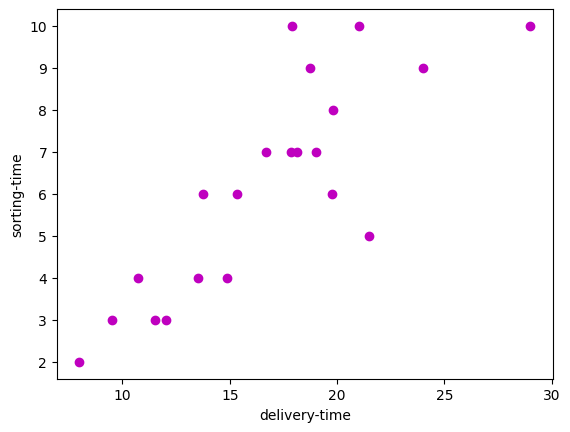

In [26]:
import matplotlib.pyplot as plt
plt.plot(data.delivery_time,data.sorting_time, "mo")
plt.xlabel("delivery-time")
plt.ylabel("sorting-time")

# Correlation

In [27]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [28]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='delivery_time', ylabel='Density'>

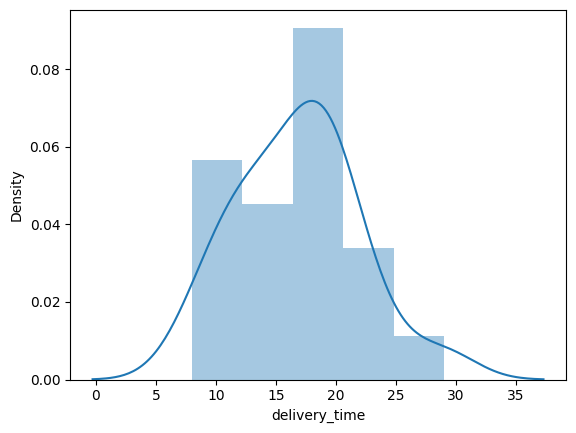

In [31]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['delivery_time'])

<Axes: xlabel='sorting_time', ylabel='Density'>

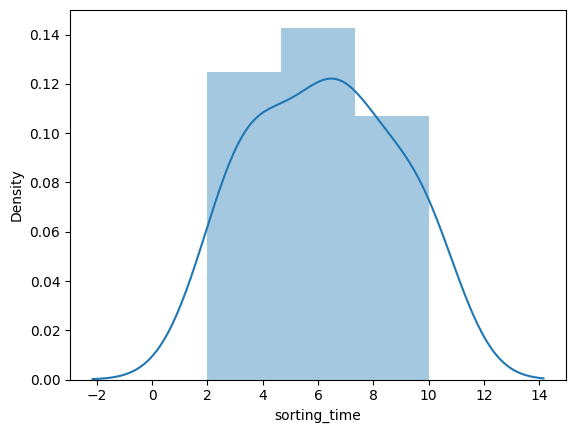

In [33]:
import seaborn as sns
sns.distplot(data['sorting_time'])

Fitting a Linear Regression Model

In [39]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        06:34:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

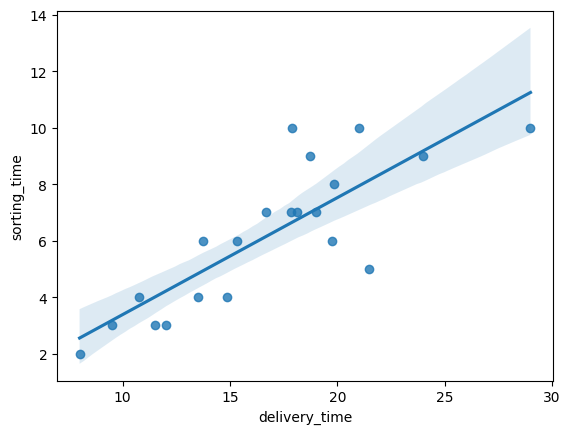

In [41]:
sns.regplot(x="delivery_time", y="sorting_time", data=data);

In [42]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [43]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [44]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [48]:
#Predict for 10 and 10 daily circulation
newdata=pd.Series([5,8])

In [55]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [56]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64